In [36]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
from prepare import makedatetime, plots, add_sales_total, hists
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm



In [2]:
df = pd.read_csv('tsa_store_data.csv')

In [3]:
df = makedatetime(df)

In [4]:
df = add_sales_total(df)

In [5]:
df

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,1,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,31,279.62
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,31,13.20
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,31,106.78


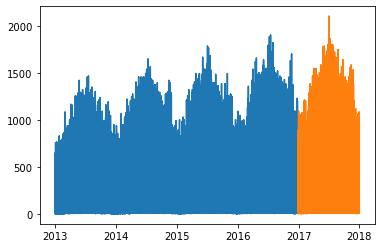

In [33]:
train_size = 0.80 # 80% train, 20% test
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # Everything up to but not including the test_start_index
test = df[test_start_index:] # Everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

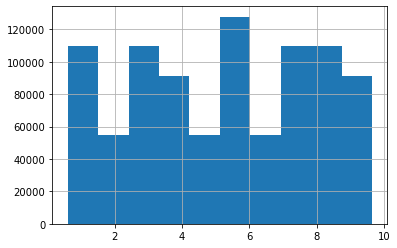

In [8]:
hists(df,'item_price')

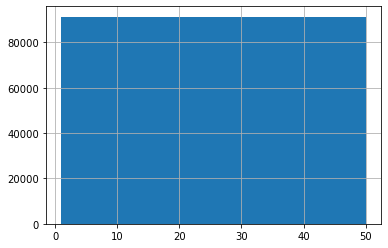

In [11]:
hists(df,'item_id')

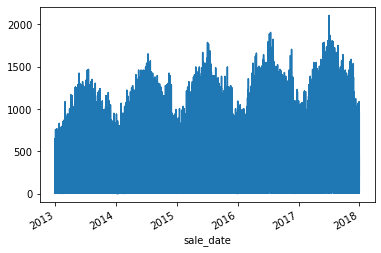

In [15]:
plots(df,'sales_total')

In [27]:
y = df.sales_total

<AxesSubplot:xlabel='sale_date'>

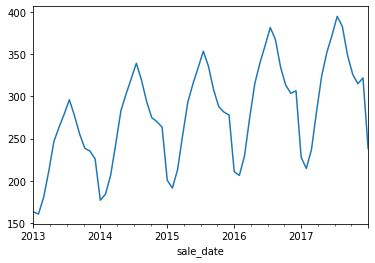

In [28]:
y.resample('4W').mean().plot()

In [29]:
y.groupby([y.index.year, y.index.month]).mean()

sale_date  sale_date
2013       1            157.894723
           2            176.411855
           3            214.181650
           4            244.460082
           5            264.663123
           6            285.261279
           7            296.881241
           8            266.183375
           9            247.237694
           10           227.868064
           11           248.108656
           12           175.753692
2014       1            182.410791
           2            203.207122
           3            244.488991
           4            282.786091
           5            306.267538
           6            324.965376
           7            342.849100
           8            307.345466
           9            281.350430
           10           263.133772
           11           286.821036
           12           200.538977
2015       1            191.725206
           2            211.589839
           3            253.739390
           4            295.147608

<AxesSubplot:xlabel='sale_date'>

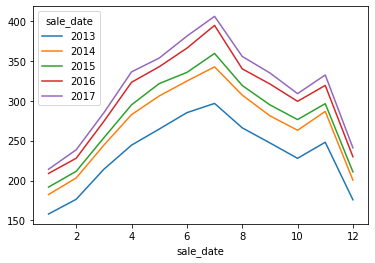

In [30]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

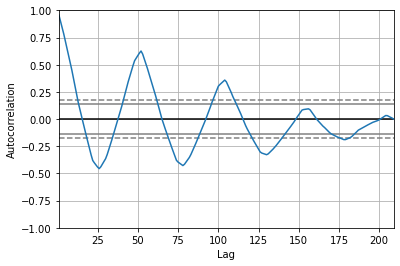

In [54]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [44]:


y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result


In [38]:
result.seasonal

sale_date
2013-01-06   -77.434871
2013-01-13   -79.225839
2013-01-20   -79.904365
2013-01-27   -80.259438
2013-02-03   -77.352773
                ...    
2016-12-04   -69.599657
2016-12-11   -73.100959
2016-12-18   -73.857529
2016-12-25   -74.634628
2017-01-01   -77.434871
Freq: W-SUN, Name: seasonal, Length: 209, dtype: float64

In [39]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434871,NaN
2013-01-13,159.981203,NaN,-79.225839,NaN
2013-01-20,157.946720,NaN,-79.904365,NaN
2013-01-27,158.545383,NaN,-80.259438,NaN
2013-02-03,167.585014,NaN,-77.352773,NaN


In [40]:
decomposition.tail()

,y,trend,seasonal,resid
sale_date,,,,
2016-12-04,263.768997,NaN,-69.599657,NaN
2016-12-11,228.559894,NaN,-73.100959,NaN
2016-12-18,229.298643,NaN,-73.857529,NaN
2016-12-25,229.231000,NaN,-74.634628,NaN
2017-01-01,218.523334,NaN,-77.434871,NaN


<AxesSubplot:xlabel='sale_date'>

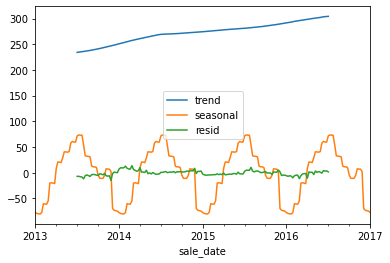

In [41]:
decomposition.iloc[:, 1:].plot()

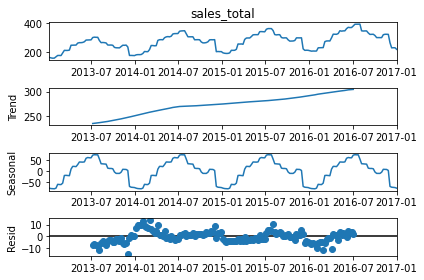

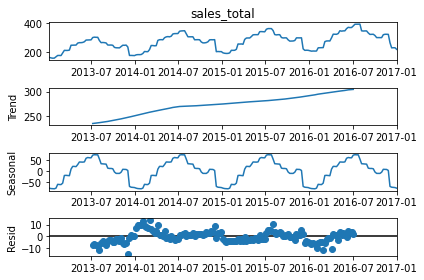

In [42]:
result.plot()

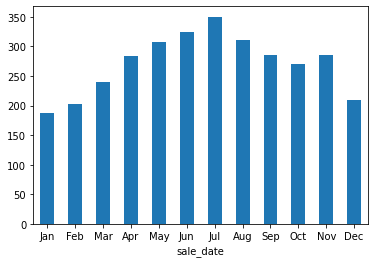

In [43]:

ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);